In [ ]:
!pip install --quiet mlflow
!pip install --quiet optuna
!pip install --quiet shap
!pip3 install --quiet auto-sklearn

#1. Building a dataset column for prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("drive/MyDrive/dados_enem/regression_data.csv", encoding='latin_1', sep = ",")

In [ ]:
df

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,CO_MUNICIPIO_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,EscolaridadePai,EscolaridadeMae,PessoasNaCasa,RendaFamiliar,AcessoAInternet,latitude,longitude,crossed_location,categoria,avg_score
0,12,M,1,1,1,2704302,505.9,551.8,498.3,461.5,1,1.0,560.0,B,B,3.0,B,A,-9.66599,-35.7350,345.414153,A,515.50
1,3,M,3,2,2,2304202,580.7,678.9,638.9,659.5,0,1.0,780.0,B,B,6.0,B,B,-9.66599,-35.7350,345.414153,A,667.60
2,2,F,3,2,2,2300150,497.7,532.4,457.6,582.6,1,1.0,780.0,D,E,4.0,C,B,-9.66599,-35.7350,345.414153,A,570.06
3,8,F,3,2,2,3106200,487.4,476.5,450.7,493.4,0,1.0,520.0,B,B,2.0,B,B,-9.66599,-35.7350,345.414153,A,485.60
4,4,F,3,2,2,2927200,507.6,539.2,494.6,413.3,1,1.0,380.0,D,D,2.0,B,B,-9.66599,-35.7350,345.414153,A,466.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934535,2,F,3,3,1,2313005,437.6,516.7,542.6,407.4,1,1.0,540.0,B,G,3.0,B,B,-1.88237,-66.9291,125.985330,A,488.86
1934536,5,M,2,2,2,2914703,484.6,434.8,424.6,394.8,1,1.0,560.0,H,E,6.0,B,B,-1.88237,-66.9291,125.985330,A,459.76
1934537,4,M,1,2,2,3205002,626.3,672.2,663.2,731.3,0,1.0,680.0,G,G,5.0,C,B,-1.88237,-66.9291,125.985330,A,674.60
1934538,4,F,3,2,2,2702306,535.2,461.6,510.8,599.9,1,1.0,800.0,D,D,5.0,A,B,-1.88237,-66.9291,125.985330,A,581.50


In [ ]:
df.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO',
       'TP_ESCOLA', 'CO_MUNICIPIO_PROVA', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO',
       'NU_NOTA_REDACAO', 'EscolaridadePai', 'EscolaridadeMae',
       'PessoasNaCasa', 'RendaFamiliar', 'AcessoAInternet', 'latitude',
       'longitude', 'crossed_location', 'categoria', 'avg_score'],
      dtype='object')

In [ ]:
df = df[['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO',
       'TP_ESCOLA', 'EscolaridadePai', 'EscolaridadeMae', 'AcessoAInternet', 'crossed_location', 'categoria', 'avg_score']]

In [ ]:
df

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,EscolaridadePai,EscolaridadeMae,AcessoAInternet,crossed_location,categoria,avg_score
0,12,M,1,1,1,B,B,A,345.414153,A,515.50
1,3,M,3,2,2,B,B,B,345.414153,A,667.60
2,2,F,3,2,2,D,E,B,345.414153,A,570.06
3,8,F,3,2,2,B,B,B,345.414153,A,485.60
4,4,F,3,2,2,D,D,B,345.414153,A,466.94
...,...,...,...,...,...,...,...,...,...,...,...
1934535,2,F,3,3,1,B,G,B,125.985330,A,488.86
1934536,5,M,2,2,2,H,E,B,125.985330,A,459.76
1934537,4,M,1,2,2,G,G,B,125.985330,A,674.60
1934538,4,F,3,2,2,D,D,B,125.985330,A,581.50


In [ ]:
for cat in df.categoria.unique():
  df.loc[df.categoria==cat,['performance']] = df[(df.categoria==cat)].avg_score>=df[(df.categoria==cat)].avg_score.median()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [ ]:
df.loc[df.performance==True,['performance']] = 'good'
df.loc[df.performance==False,['performance']] = 'bad'
df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,EscolaridadePai,EscolaridadeMae,AcessoAInternet,crossed_location,categoria,avg_score,performance
0,12,M,1,1,1,B,B,A,345.414153,A,515.50,good
1,3,M,3,2,2,B,B,B,345.414153,A,667.60,good
2,2,F,3,2,2,D,E,B,345.414153,A,570.06,good
3,8,F,3,2,2,B,B,B,345.414153,A,485.60,bad
4,4,F,3,2,2,D,D,B,345.414153,A,466.94,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1934535,2,F,3,3,1,B,G,B,125.985330,A,488.86,bad
1934536,5,M,2,2,2,H,E,B,125.985330,A,459.76,bad
1934537,4,M,1,2,2,G,G,B,125.985330,A,674.60,good
1934538,4,F,3,2,2,D,D,B,125.985330,A,581.50,good


In [ ]:
df.dtypes

TP_FAIXA_ETARIA       int64
TP_SEXO              object
TP_COR_RACA           int64
TP_ST_CONCLUSAO       int64
TP_ESCOLA             int64
EscolaridadePai      object
EscolaridadeMae      object
AcessoAInternet      object
crossed_location    float64
categoria            object
avg_score           float64
performance          object
dtype: object

In [ ]:
df.TP_SEXO = df.TP_SEXO.astype('category')
df.EscolaridadeMae = df.EscolaridadeMae.astype('category')
df.EscolaridadePai = df.EscolaridadePai.astype('category')
df.AcessoAInternet = df.AcessoAInternet.astype('category')
df.performance = df.performance.astype('category')
df.categoria = df.categoria.astype('category')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
dfL = df

In [ ]:
for chave in df.columns:
  try:
    df[chave] = df[chave].cat.codes
  except:
    pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,EscolaridadePai,EscolaridadeMae,AcessoAInternet,crossed_location,categoria,avg_score,performance
0,12,1,1,1,1,1,1,0,345.414153,0,515.50,1
1,3,1,3,2,2,1,1,1,345.414153,0,667.60,1
2,2,0,3,2,2,3,4,1,345.414153,0,570.06,1
3,8,0,3,2,2,1,1,1,345.414153,0,485.60,0
4,4,0,3,2,2,3,3,1,345.414153,0,466.94,0


In [ ]:
df.dtypes

TP_FAIXA_ETARIA       int64
TP_SEXO                int8
TP_COR_RACA           int64
TP_ST_CONCLUSAO       int64
TP_ESCOLA             int64
EscolaridadePai        int8
EscolaridadeMae        int8
AcessoAInternet        int8
crossed_location    float64
categoria              int8
avg_score           float64
performance            int8
dtype: object

In [ ]:
len(df)

1934540

In [ ]:
df = df.sample(int(0.003*len(df)))
len(df)

5803

# 2. Performing ML experiments

In [ ]:
#Splitting between train 60%, test 20% and validation 20%
import sklearn.model_selection
#For cross-validation
data_x, data_y = df.drop(["performance"], axis=1), df[['performance']]

train, test_validation = sklearn.model_selection.train_test_split(df, test_size=0.40, random_state = 12)
test, validation = sklearn.model_selection.train_test_split(test_validation, test_size = 0.50, random_state = 49)

#Class names
class_names = ["bad", "good"]

# The predicted column will be the student's performance
train_x, train_y = train.drop(["performance"], axis=1), train[['performance']]
test_x, test_y = test.drop(["performance"], axis=1), test[['performance']]
validation_x, validation_y = validation.drop(["performance"], axis=1), validation[['performance']]
test_validation_x, test_validation_y = test_validation.drop(["performance"], axis=1), test_validation[['performance']]

train_x.drop(columns='avg_score', inplace=True)
validation_x.drop(columns='avg_score', inplace=True)
test_x.drop(columns='avg_score', inplace=True)
test_validation_x.drop(columns='avg_score', inplace=True)

train_y = np.ravel(train_y)
validation_y  = np.ravel(validation_y)
test_y = np.ravel(test_y)
test_validation_y  = np.ravel(test_validation_y)

## MLP

In [ ]:
import mlflow
import mlflow.sklearn
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

def eval_metrics(actual, pred, class_names):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    report = classification_report(actual, pred, target_names=class_names)
    acc = accuracy_score(actual, pred)
    c_matrix = confusion_matrix(actual, pred)
    
    return rmse, mae, r2, report, c_matrix, acc

def get_best_score(scores, metric='r2'):
  best_metric = 0
  best = "a"
  for score in scores:
    print(score)
    if score[metric].mean()>best_metric:
      best = score
      best_metric = score[metric]
  return (best)

def get_score(model, score_type, data_x, data_y, labels, cv=3):

  score = cross_validate(model, data_x, labels, cv=3, 
                          scoring= ['roc_auc', 
                                    'r2', 
                                    'accuracy',
                                    'f1'])
  print(score_type)
  for key in score.keys():
    print("{}: {}".format(key, score[key].mean()))
    mlflow.log_metric(key, score[key].mean())
  
  c_matrix = confusion_matrix(labels, data_y)
  print(c_matrix)
  
  print("")

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

with mlflow.start_run():
  mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=91)
  mlp.fit(train_x,train_y)

  predicted_train = mlp.predict(train_x)
  predicted_test_val = mlp.predict(test_validation_x)
  get_score(mlp, 'train', train_x, predicted_train, train_y)
  get_score(mlp, 'test_val', test_validation_x, predicted_test_val, test_validation_y)
  print(accuracy_score(predicted_train, train_y))

train
fit_time: 0.39984750747680664
score_time: 0.009066263834635416
test_roc_auc: 0.612656171483783
test_r2: -0.739518321774271
test_accuracy: 0.5653439860603721
test_f1: 0.5117663049738522
[[ 687 1014]
 [ 425 1355]]

test_val
fit_time: 0.2251122792561849
score_time: 0.008515040079752604
test_roc_auc: 0.5708651773466588
test_r2: -0.8718133718133722
test_accuracy: 0.5322997416020672
test_f1: 0.474678579674604
[[429 705]
 [288 900]]

0.5866130422292445


In [ ]:
from time import time
from sklearn.model_selection import RandomizedSearchCV

mlp = MLPClassifier()


# specify parameters and distributions to sample from
param_dist = {
    'hidden_layer_sizes' : [(100,), (30,), (15,)],
    "activation" : ['relu', 'tanh'],
    "alpha" : [0.0001, 0.001, 0.1]
}

# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(
    mlp, param_distributions=param_dist, n_iter=n_iter_search, scoring='roc_auc'
)

start = time()
random_search.fit(train_x, train_y)

print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)

RandomizedSearchCV took 48.18 seconds for 15 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.628 (std: 0.013)
Parameters: {'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'relu'}

Model with rank: 2
Mean validation score: 0.626 (std: 0.007)
Parameters: {'hidden_layer_sizes': (30,), 'alpha': 0.001, 'activation': 'relu'}

Model with rank: 3
Mean validation score: 0.626 (std: 0.017)
Parameters: {'hidden_layer_sizes': (100,), 'alpha': 0.001, 'activation': 'tanh'}



In [ ]:
# Training a MLP with the best found parameters
with mlflow.start_run():
  mlp = MLPClassifier(hidden_layer_sizes = (100,), alpha = 0.001, activation = 'tanh')
  mlp.fit(train_x,train_y)

  predicted_train = mlp.predict(train_x)
  predicted_test_val = mlp.predict(test_validation_x)
  get_score(mlp, 'train', train_x, predicted_train, train_y)
  get_score(mlp, 'test_val', test_validation_x, predicted_test_val, test_validation_y)

train
fit_time: 0.9962430795033773
score_time: 0.015819867451985676
test_roc_auc: 0.6215310257427135
test_r2: -0.6302992630517458
test_accuracy: 0.5926346688843348
test_f1: 0.5809098673264096
[[ 589 1112]
 [ 336 1444]]

test_val
fit_time: 0.7958221435546875
score_time: 0.010850826899210611
test_roc_auc: 0.5993733632622522
test_r2: -0.7390973224306561
test_accuracy: 0.5654608096468562
test_f1: 0.5701313794287804
[[370 764]
 [220 968]]



In [ ]:
import optuna
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix, accuracy_score

def objective(trial):

    n_layers = trial.suggest_int('n_layers', 1, 4)
    layers = []
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    alpha = trial.suggest_float('aplha', 0.0001, 0.1)
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 70, 100))

    classificador = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=tuple(layers), alpha = alpha, activation = activation)
    classificador.fit(train_x, train_y)

    predição = classificador.predict(validation_x)
  
    metrica = mean_squared_error(validation_y, predição)
    return metrica

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

#print('roc_auc: {}'.format(trial.value))
print('MSE in validation set : {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-10-03 23:58:08,630] A new study created in memory with name: no-name-23536aae-f239-4962-815c-066d03a917aa
[I 2022-10-03 23:58:17,916] Trial 0 finished with value: 0.4082687338501292 and parameters: {'n_layers': 3, 'activation': 'tanh', 'aplha': 0.08747807919273592, 'n_units_0': 100, 'n_units_1': 82, 'n_units_2': 86}. Best is trial 0 with value: 0.4082687338501292.
[I 2022-10-03 23:58:18,682] Trial 1 finished with value: 0.4599483204134367 and parameters: {'n_layers': 1, 'activation': 'relu', 'aplha': 0.09857843844354063, 'n_units_0': 86}. Best is trial 1 with value: 0.4599483204134367.
[I 2022-10-03 23:58:19,282] Trial 2 finished with value: 0.4487510766580534 and parameters: {'n_layers': 2, 'activation': 'relu', 'aplha': 0.05347481135765274, 'n_units_0': 76, 'n_units_1': 75}. Best is trial 1 with value: 0.4599483204134367.
[I 2022-10-03 23:58:19,761] Trial 3 finished with value: 0.4909560723514212 and parameters: {'n_layers': 2, 'activation': 'relu', 'aplha': 0.055634316142157

MSE in validation set : 0.5133505598621878
Best hyperparameters: {'n_layers': 3, 'activation': 'relu', 'aplha': 0.059070031612586046, 'n_units_0': 82, 'n_units_1': 93, 'n_units_2': 97}


In [ ]:
import mlflow
import mlflow.sklearn
with mlflow.start_run():
  mlp = MLPClassifier((82,93,97), activation = 'relu', alpha = 0.059070031612586046)
  mlp.fit(train_x, train_y)
  predicted_train = mlp.predict(train_x)
  predicted_test_val = mlp.predict(test_validation_x)
  get_score(mlp, 'train', train_x, predicted_train, train_y)
  get_score(mlp, 'test_val', test_validation_x, predicted_test_val, test_validation_y)

train
fit_time: 0.7906665007273356
score_time: 0.014168024063110352
test_roc_auc: 0.548389388086402
test_r2: -0.9935507001274289
test_accuracy: 0.5018691773837457
test_f1: 0.34817882619188145
[[ 349 1352]
 [ 188 1592]]

test_val
fit_time: 0.7436416943868002
score_time: 0.012919267018636068
test_roc_auc: 0.5202265155968859
test_r2: -0.9976350809684146
test_accuracy: 0.5008613264427217
test_f1: 0.2792970365517989
[[ 220  914]
 [ 131 1057]]



## Outros modelos

In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay

## Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classificadorGNB = GaussianNB()
classificadorGNB.fit(train_x, train_y)
prediçãoTreinoGNB = classificadorGNB.predict(train_x)
prediçãoValidaçãoGNB = classificadorGNB.predict(validation_x)

acuráciaTreinoGNB = accuracy_score(train_y, prediçãoTreinoGNB)
acuráciaValidaçãoGNB = accuracy_score(validation_y, prediçãoValidaçãoGNB)
print('Acurácia no conj. de treino:', round(acuráciaTreinoGNB, 3),
      '\nAcurácia no conj. de validação:', round(acuráciaValidaçãoGNB, 3))

Acurácia no conj. de treino: 0.587 
Acurácia no conj. de validação: 0.576


In [ ]:
f1_score(validation_y, prediçãoValidaçãoGNB)

0.646551724137931

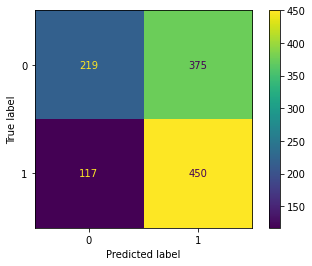

In [ ]:
try:
  ConfusionMatrixDisplay(confusion_matrix(validation_y, prediçãoValidaçãoGNB)).plot().show()
except:
  pass

In [ ]:
with mlflow.start_run() as run:
  mlflow.sklearn.log_model(classificadorGNB, "GNB")

## Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
classificadorLR = LogisticRegression(max_iter=1000)
classificadorLR.fit(train_x, train_y)
prediçãoTreinoLR = classificadorLR.predict(train_x)
prediçãoValidaçãoLR = classificadorLR.predict(validation_x)

acuráciaTreinoLR = accuracy_score(train_y, prediçãoTreinoLR)
acuráciaValidaçãoLR = accuracy_score(validation_y, prediçãoValidaçãoLR)
print('Acurácia no conj. de treino:', round(acuráciaTreinoLR, 3),
      '\nAcurácia no conj. de validação:', round(acuráciaValidaçãoLR, 3))

Acurácia no conj. de treino: 0.614 
Acurácia no conj. de validação: 0.607


In [ ]:
f1_score(validation_y, prediçãoValidaçãoLR)

0.6262295081967213

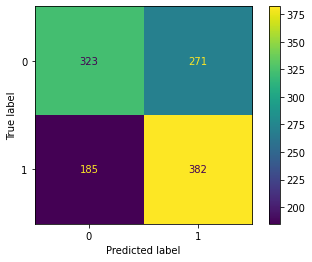

In [ ]:
try:
  ConfusionMatrixDisplay(confusion_matrix(validation_y, prediçãoValidaçãoLR)).plot().show()
except:
  pass

In [ ]:
with mlflow.start_run() as run:
  mlflow.sklearn.log_model(classificadorLR, "LR")

## Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import optuna

In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 2, 40)
    max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    
    classificador = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion)
    classificador.fit(train_x, train_y)
    predição = classificador.predict(validation_x)
    
    metrica = accuracy_score(validation_y, predição)
    return metrica


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

#print('roc_auc: {}'.format(trial.value))
print('Acurácia no cunjunto de validação : {}'.format(trial.value))
print("Melhores hiperparâmetros: {}".format(trial.params))

[I 2022-10-03 23:49:02,792] A new study created in memory with name: no-name-49dd37ab-5a01-438b-8045-ad2e53521b45
[I 2022-10-03 23:49:02,902] Trial 0 finished with value: 0.6124031007751938 and parameters: {'n_estimators': 32, 'max_depth': 7.9975988885826, 'criterion': 'gini'}. Best is trial 0 with value: 0.6124031007751938.
[I 2022-10-03 23:49:02,967] Trial 1 finished with value: 0.5874246339362619 and parameters: {'n_estimators': 25, 'max_depth': 2.3963020306191525, 'criterion': 'gini'}. Best is trial 0 with value: 0.6124031007751938.
[I 2022-10-03 23:49:02,994] Trial 2 finished with value: 0.599483204134367 and parameters: {'n_estimators': 6, 'max_depth': 6.768653864838612, 'criterion': 'gini'}. Best is trial 0 with value: 0.6124031007751938.
[I 2022-10-03 23:49:03,080] Trial 3 finished with value: 0.5977605512489234 and parameters: {'n_estimators': 38, 'max_depth': 2.0572651926775096, 'criterion': 'gini'}. Best is trial 0 with value: 0.6124031007751938.
[I 2022-10-03 23:49:03,097] 

Acurácia no cunjunto de validação : 0.6287683031869078
Melhores hiperparâmetros: {'n_estimators': 11, 'max_depth': 3.777340772907149, 'criterion': 'gini'}


Rerodando melhor modelo

In [ ]:
classificadorRF = RandomForestClassifier(n_estimators=24, max_depth=3, criterion='entropy')
classificadorRF.fit(train_x, train_y)
prediçãoTreinoRF = classificadorRF.predict(train_x)
prediçãoValidaçãoRF = classificadorRF.predict(validation_x)

acuráciaTreinoRF = accuracy_score(train_y, prediçãoTreinoRF)
acuráciaValidaçãoRF = accuracy_score(validation_y, prediçãoValidaçãoRF)
print('Acurácia no conj. de treino:', round(acuráciaTreinoRF, 3),
      '\nAcurácia no conj. de validação:', round(acuráciaValidaçãoRF, 3))

Acurácia no conj. de treino: 0.622 
Acurácia no conj. de validação: 0.609


In [ ]:
f1_score(validation_y, prediçãoValidaçãoRF)

0.6139455782312926

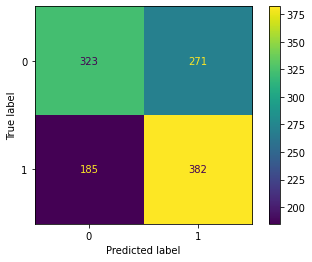

In [ ]:
try:
  ConfusionMatrixDisplay(confusion_matrix(validation_y, prediçãoValidaçãoLR)).plot().show()
except:
  pass

In [ ]:
with mlflow.start_run() as run:
  mlflow.sklearn.log_model(classificadorRF, "RF")

---------- avaliando MLP -----------

In [ ]:
from sklearn.neural_network import MLPClassifier
classificadorMLP = MLPClassifier((82,93,97), activation = 'relu', alpha = 0.059070031612586046)
classificadorMLP.fit(train_x,train_y)
prediçãoTreinoMLP = classificadorMLP.predict(train_x)
prediçãoValidaçãoMLP = classificadorMLP.predict(validation_x)

acuráciaTreinoMLP = accuracy_score(train_y, prediçãoTreinoMLP)
acuráciaValidaçãoMLP = accuracy_score(validation_y, prediçãoValidaçãoMLP)
print('Acurácia no conj. de treino:', round(acuráciaTreinoMLP, 3),
      '\nAcurácia no conj. de validação:', round(acuráciaValidaçãoMLP, 3))

Acurácia no conj. de treino: 0.599 
Acurácia no conj. de validação: 0.577


In [ ]:
f1_score(validation_y, prediçãoValidaçãoMLP)

0.6354862657757981

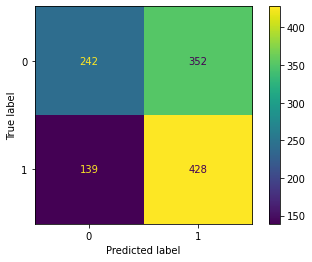

In [ ]:
try:
  ConfusionMatrixDisplay(confusion_matrix(validation_y, prediçãoValidaçãoMLP)).plot().show()
except:
  pass

# Auto sklearn

In [ ]:
import sklearn.metrics

import autosklearn.classification

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder="/tmp/autosklearn_classification_example_tmp",
)
automl.fit(train_x, train_y, dataset_name="ENEM 2021")

AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      per_run_time_limit=30, time_left_for_this_task=120,
                      tmp_folder='/tmp/autosklearn_classification_example_tmp')

In [ ]:
print(automl.leaderboard())

          rank  ensemble_weight           type      cost   duration
model_id                                                           
10           1             0.42            mlp  0.389904   5.461952
8            2             0.04            mlp  0.409922  19.072093
3            3             0.08    extra_trees  0.418625   7.420039
2            4             0.10  random_forest  0.423847   5.158513
11           5             0.30            lda  0.429069   2.464413
6            6             0.02    gaussian_nb  0.431680   1.134147
7            7             0.02    gaussian_nb  0.436031   1.174297
13           8             0.02  random_forest  0.439513   4.701353


In [ ]:
from pprint import pprint
pprint(automl.show_models(), indent=4)

{   2: {   'balancing': Balancing(random_state=1),
           'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7fae1b56c350>,
           'cost': 0.4238468233246301,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fae1b94fe10>,
           'ensemble_weight': 0.1,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fae1b56c290>,
           'model_id': 2,
           'rank': 1,
           'sklearn_classifier': RandomForestClassifier(max_features=3, n_estimators=512, n_jobs=1,
                       random_state=1, warm_start=True)},
    3: {   'balancing': Balancing(random_state=1),
           'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7fae1b6e5310>,
           'cost': 0.41862489120974755,
           'data_preprocessor': <autosklearn.pipeline.components.da

In [ ]:
predictions = automl.predict(test_x)
print("Accuracy score:", accuracy_score(test_y, predictions))

Accuracy score: 0.5813953488372093


# Melhorando Melhor Modelo

Comparação dos modelos

In [ ]:
import matplotlib.pyplot as plt

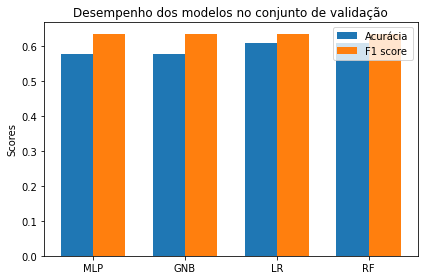

In [ ]:
labels = ['MLP', 'GNB', 'LR', 'RF']
acurácia = [accuracy_score(validation_y, prediçãoValidaçãoMLP),
            accuracy_score(validation_y, prediçãoValidaçãoGNB),
            accuracy_score(validation_y, prediçãoValidaçãoLR),
            accuracy_score(validation_y, prediçãoValidaçãoRF)]
f1 = [f1_score(validation_y, prediçãoValidaçãoMLP),
      f1_score(validation_y, prediçãoValidaçãoMLP),
      f1_score(validation_y, prediçãoValidaçãoMLP),
      f1_score(validation_y, prediçãoValidaçãoMLP)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, acurácia, width, label='Acurácia')
rects2 = ax.bar(x + width/2, f1, width, label='F1 score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Desempenho dos modelos no conjunto de validação')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

Randon Forrest

## Interpretação

In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(classificadorRF.predict, test_x)
shap_values = explainer(test_x)

Exact explainer: 1162it [03:08,  5.91it/s]


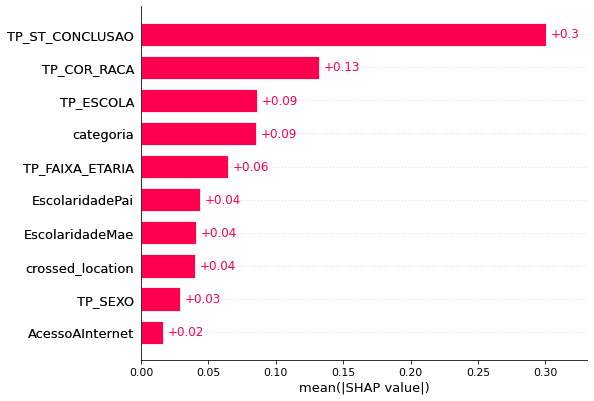

In [ ]:
shap.plots.bar(shap_values)

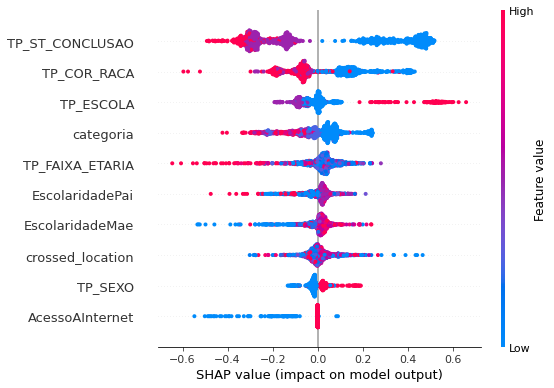

In [ ]:
shap.summary_plot(shap_values)

A

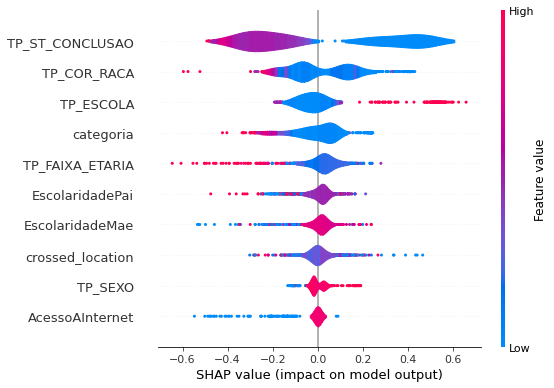

In [ ]:
shap.summary_plot(shap_values, plot_type='violin')

### Treinando o modelo com mais dados

Usando o dataset completo

In [ ]:
classificadorRF.fit(train_x, train_y)
prediçãoTreinoRF = classificadorRF.predict(train_x)
prediçãoValidaçãoRF = classificadorRF.predict(validation_x)

acuráciaTreinoRF = accuracy_score(train_y, prediçãoTreinoRF)
acuráciaValidaçãoRF = accuracy_score(validation_y, prediçãoValidaçãoRF)
print('Acurácia no conj. de treino:', round(acuráciaTreinoRF, 3),
      '\nAcurácia no conj. de validação:', round(acuráciaValidaçãoRF, 3))

Acurácia no conj. de treino: 0.612 
Acurácia no conj. de validação: 0.612
